This notebook file concerns the network analysis measures applied on the first graph of our project, including all the links (in form of citations) between films, whose country of origin is United States, East Asia, or a combination of both. The detailed creation of the network is containe in the 'graph1.ipynb' notebook.


In [1]:
#graph 1 measures

#libs

import networkx as nx
import os
import operator
from tqdm import tqdm
import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

#import graph file
cwd = os.getcwd()
path ="/".join(list(cwd.split('/')[0:-1])) 
file = path + "/graph_files/graph-movie-cit.gexf"
graph = nx.read_gexf(file)

In [2]:
# print the nodes and edges of the subgraph
print("Nodes:", len(graph.nodes()))
print("Edges:", len(graph.edges()))


Nodes: 26588
Edges: 86944


After importing our libraries and our graph file, we start with the measures. In some cases a tdqm progress bar was implemented in order to track the execution of the functions in case they were time-consuming.

In [3]:

# START MEASURES

# PageRank
def pagerank_progress(G, damping=0.85):
    pagerank_dict = nx.pagerank(G, damping)

    # Create a tqdm progress bar
    pbar = tqdm(total=len(G.nodes()), desc="PageRank")

    # Update the progress bar for each node
    for node in G.nodes():
        # Do the PageRank calculation for each node
        pagerank_dict[node]

        # Update the progress bar
        pbar.update(1)

    pbar.close()
    return pagerank_dict

pagerank_dict = pagerank_progress(graph, damping=0.85)


df_pagerank = pd.DataFrame(columns=["Film", "PageRank Score", "Country", "tconst", "Year","Genres"])
for node, centrality in pagerank_dict.items():
    country = graph.nodes[node]["country"]
    tconst = graph.nodes[node]["tconst"]
    year = graph.nodes[node]["year"]
    genres = graph.nodes[node]["genres"]
    
    row = {"Film": node, "PageRank Score": centrality, "Country": country, "tconst": tconst, "Year": year, "Genres": genres}
    df_pagerank = pd.concat([df_pagerank, pd.DataFrame(row, index=[0])], ignore_index=True)

df_pagerank = df_pagerank.sort_values(by="PageRank Score", ascending=False, ignore_index=True)

df_pagerank.to_csv('df_pagerank.csv')
df_pagerank.head(10)


PageRank: 100%|██████████████████████| 26588/26588 [00:00<00:00, 2504506.36it/s]


,Film,PageRank Score,Country,tconst,Year,Genres
0,The Wizard of Oz (1939),0.007588,USA,tt0032138,1939,"Adventure,Family,Fantasy"
1,Dracula (1931),0.004916,USA,tt0021815,1931,"Drama,Fantasy,Horror"
2,Star Wars (1977),0.004559,USA,tt0076759,1977,"Action,Adventure,Fantasy"
3,Psycho (1960),0.004376,USA,tt0054215,1960,"Horror,Mystery,Thriller"
4,King Kong (1933),0.004286,USA,tt0024216,1933,"Adventure,Horror,Sci-Fi"
5,The Birth of a Nation (1915),0.003922,USA,tt0004972,1915,"Drama,War"
6,Snow White and the Seven Dwarfs (1937),0.003227,USA,tt0029583,1937,"Adventure,Animation,Family"
7,Frankenstein (1931),0.002910,USA,tt0021884,1931,"Drama,Horror,Sci-Fi"
8,Shadow of a Doubt (1943),0.002713,USA,tt0036342,1943,"Film-Noir,Thriller"
9,2001: A Space Odyssey (1968),0.002700,USA,tt0062622,1968,"Adventure,Sci-Fi"


After computing and saving the pageRank results, we begin to calculate centrality scores, in detail
<ul>
    <li> Out-Degree, measuring the amount of a node (film's) citations to other films </li>
    <li> In-Degree, measuring a node's incoming citations from other films</li>
    <li> Eigenvector centrality, which assigns a score based on the node's in-degree centrality, but considering the nature of its neighbors.
        
</ul>

In [4]:
#CENTRALITY MEASURES

# Out-degree 
# nodes according to their outward citations


def out_degree_with_progress(G):
    out_deg = dict(G.out_degree())

    # Create a tqdm progress bar
    pbar = tqdm(total=len(G.nodes()), desc="Out-degree")

    # Update the progress bar for each node
    for node in G.nodes():
        # Do the out-degree calculation for each node
        out_deg[node]

        # Update the progress bar
        pbar.update(1)

    pbar.close()
    return out_deg

out_deg = out_degree_with_progress(graph)

df_out_degree = pd.DataFrame(columns=["Film", "Out-Degree Centrality", "Country", "tconst", "Year","Genres"])
for node, centrality in out_deg.items():
    country = graph.nodes[node]["country"]
    tconst = graph.nodes[node]["tconst"]
    year = graph.nodes[node]["year"]
    genres = graph.nodes[node]["genres"]

    
    # Append a new row to the DataFrame
    row = {"Film": node, "Out-Degree Centrality": centrality, "Country": country, "tconst": tconst, "Year": year,"Genres":genres}
    df_out_degree = pd.concat([df_out_degree, pd.DataFrame(row, index=[0])], ignore_index=True)

df_out_degree = df_out_degree.sort_values(by="Out-Degree Centrality", ascending=False,ignore_index=True)

df_out_degree.to_csv('df_out_degree.csv')
df_out_degree.head(10)

Out-degree: 100%|████████████████████| 26588/26588 [00:00<00:00, 4154304.68it/s]


,Film,Out-Degree Centrality,Country,tconst,Year,Genres
0,Rewind This! (2013),704,USA,tt2395970,2013,Documentary
1,Adjust Your Tracking (2013),562,USA,tt2395133,2013,Documentary
2,Film Geek (2005),502,USA,tt0443506,2005,Comedy
3,Be Kind Rewind (2008),455,USA,tt0799934,2008,Comedy
4,American Grindhouse (2010),293,USA,tt1307861,2010,Documentary
5,Jersey Girl (2004),261,USA,tt0300051,2004,"Comedy,Drama,Romance"
6,Going to Pieces: The Rise and Fall of the Slas...,257,USA,tt0489062,2006,"Documentary,Horror"
7,That's Sexploitation! (2013),236,USA,tt0228933,2013,Documentary
8,"Nightmares in Red, White and Blue: The Evoluti...",226,USA,tt1337117,2009,"Documentary,Horror"
9,Cleanflix (2009),219,USA,tt1007026,2009,"Crime,Documentary,History"


In [5]:
# In-degree centrality for each node
in_degree_centrality = nx.in_degree_centrality(graph)

df_in_degree = pd.DataFrame(columns=["Film", "In-Degree Centrality", "Country", "tconst", "Year","Genres"])
for node, centrality in in_degree_centrality.items():
    country = graph.nodes[node]["country"]
    tconst = graph.nodes[node]["tconst"]
    year = graph.nodes[node]["year"]
    genres = graph.nodes[node]["genres"]
    
    # Append the data to the DataFrame
    row = {"Film": node, "In-Degree Centrality": centrality, "Country": country, "tconst": tconst, "Year": year,"Genres":genres}
    df_in_degree = pd.concat([df_in_degree, pd.DataFrame(row, index=[0])], ignore_index=True)

df_in_degree = df_in_degree.sort_values(by="In-Degree Centrality", ascending=False,ignore_index=True)
df_in_degree.to_csv('df_in_degree.csv')
df_in_degree.head(10)
#should i filter out USA countries?

,Film,In-Degree Centrality,Country,tconst,Year,Genres
0,Star Wars (1977),0.028999,USA,tt0076759,1977,"Action,Adventure,Fantasy"
1,The Wizard of Oz (1939),0.027570,USA,tt0032138,1939,"Adventure,Family,Fantasy"
2,Psycho (1960),0.015647,USA,tt0054215,1960,"Horror,Mystery,Thriller"
3,Jaws (1975),0.012939,USA,tt0073195,1975,"Adventure,Thriller"
4,The Godfather (1972),0.012939,USA,tt0068646,1972,"Crime,Drama"
5,Gone with the Wind (1939),0.011020,USA,tt0031381,1939,"Drama,Romance,War"
6,Casablanca (1942),0.010983,USA,tt0034583,1942,"Drama,Romance,War"
7,2001: A Space Odyssey (1968),0.010607,USA,tt0062622,1968,"Adventure,Sci-Fi"
8,The Shining (1980),0.010569,USA,tt0081505,1980,"Drama,Horror"
9,King Kong (1933),0.010155,USA,tt0024216,1933,"Adventure,Horror,Sci-Fi"


In [40]:
#Eigenvector centrality

eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)


df_eigenvector = pd.DataFrame(columns=["Film", "Eigenvector Centrality", "Country", "tconst", "Year","Genres"])
for node, centrality in eigenvector_centrality.items():
    country = graph.nodes[node]["country"]
    tconst = graph.nodes[node]["tconst"]
    year = graph.nodes[node]["year"]
    genres = graph.nodes[node]["genres"]
    
    # Append the data to the DataFrame
    row = {"Film": node, "Eigenvector Centrality": centrality, "Country": country, "tconst": tconst, "Year": year,"Genres":genres}
    df_eigenvector = pd.concat([df_eigenvector, pd.DataFrame(row, index=[0])], ignore_index=True)

df_eigenvector = df_eigenvector.sort_values(by="Eigenvector Centrality", ascending=False,ignore_index=True)

df_eigenvector.reset_index(drop=True)
df_eigenvector.to_csv('df_eigenvector.csv')
df_eigenvector.head(40)

,Film,Eigenvector Centrality,Country,tconst,Year,Genres
0,The House Without a Key (1926),0.796142,USA,tt0015930,1926,"Action,Adventure,Crime"
1,The Chinese Parrot (1927),0.483239,USA,tt0017752,1927,Mystery
2,Behind That Curtain (1929),0.291741,USA,tt0019684,1929,"Adventure,Crime,Mystery"
3,Charlie Chan Carries On (1931),0.175164,USA,tt0021733,1931,Mystery
4,The Black Camel (1931),0.104582,USA,tt0021668,1931,"Crime,Mystery,Thriller"
5,Charlie Chan's Chance (1932),0.062083,USA,tt0022755,1932,Mystery
6,Charlie Chan's Greatest Case (1933),0.036640,USA,tt0023881,1933,Mystery
7,Charlie Chan's Courage (1934),0.021494,USA,tt0024969,1934,"Adventure,Crime,Mystery"
8,Charlie Chan in London (1934),0.012533,USA,tt0024968,1934,"Crime,Drama,Mystery"
9,Charlie Chan in Paris (1935),0.007262,USA,tt0026198,1935,"Crime,Drama,Music"


The fact that our data includes more information regarding US films is notably
mirrored on our results; we therefore thought it was necessary to consider films that were most frequently cited by films whose country was not the same by that of its origin, which especially in the case of Asian films, can show the wide extent of its influence.

In [8]:
# split non-USA films and USA films
non_us_movies = [node for node in graph.nodes() if graph.nodes[node]["country"] != "USA"]
us_movies = [node for node in graph.nodes() if graph.nodes[node]["country"] == "USA"]

# in-degree centrality for non-USA films by USA films
non_us_citations_by_usa = {node: in_degree_centrality[node] for node in non_us_movies if any(neighbor in us_movies for neighbor in graph.predecessors(node))}
top_cited_non_usa_by_usa = sorted(non_us_citations_by_usa, key=non_us_citations_by_usa.get, reverse=True)[:20]
top_cited_non_usa_by_usa_citations = [non_us_citations_by_usa[film] for film in top_cited_non_usa_by_usa]
cited_by_usa_films = {film: [cited_film for cited_film in graph.predecessors(film) if cited_film in us_movies] for film in top_cited_non_usa_by_usa}

# in-degree centrality for USA films by non-USA films
usa_citations_by_non_usa = {node: in_degree_centrality[node] for node in us_movies if any(neighbor in non_us_movies for neighbor in graph.predecessors(node))}
top_cited_usa_by_non_usa = sorted(usa_citations_by_non_usa, key=usa_citations_by_non_usa.get, reverse=True)[:20]
top_cited_usa_by_non_usa_citations = [usa_citations_by_non_usa[film] for film in top_cited_usa_by_non_usa]
cited_by_non_usa_films = {film: [cited_film for cited_film in graph.predecessors(film) if cited_film in non_us_movies] for film in top_cited_usa_by_non_usa}

#top 10 Cited Non-USA Films by USA Films
data_non_usa_films = []
columns_non_usa_films = ["Film", "Country", "Citation Count", "Film tconst", "Film Year","Film Genres", "Citing Film", "Citing Film tconst", "Citing Film Year", "Citing Film Country","Citing Film Genres"]

for i, film in enumerate(top_cited_non_usa_by_usa):
    citation_count = top_cited_non_usa_by_usa_citations[i]
    citing_films = cited_by_usa_films[film]
    film_tconst = graph.nodes[film].get("tconst", "")
    film_year = graph.nodes[film].get("year", "")
    film_country = graph.nodes[film].get("country", "")
    film_genres = graph.nodes[film].get("genres", "")

    citing_film_data = []
    for citing_film in citing_films:
        citing_film_tconst = graph.nodes[citing_film].get("tconst", "")
        citing_film_year = graph.nodes[citing_film].get("year", "")
        citing_film_country = graph.nodes[citing_film].get("country", "")
        citing_film_genres = graph.nodes[citing_film].get("genres", "")

        citing_film_data.append([film, film_country, citation_count, film_tconst, film_year, film_genres, citing_film, citing_film_tconst, citing_film_year, citing_film_country, citing_film_genres])
    data_non_usa_films.extend(citing_film_data)

df_non_usa_films = pd.DataFrame(data_non_usa_films, columns=columns_non_usa_films)


#top 10 Cited USA Films by Non-USA Films
data_usa_films = []
columns_usa_films = ["Film", "Country", "Citation Count", "Film tconst", "Film Year", "Film Genres","Citing Film", "Citing Film tconst", "Citing Film Year", "Citing Film Country","Citing Film Genres"]

for i, film in enumerate(top_cited_usa_by_non_usa):
    citation_count = top_cited_usa_by_non_usa_citations[i]
    citing_films = cited_by_non_usa_films[film]
    film_tconst = graph.nodes[film].get("tconst", "")
    film_year = graph.nodes[film].get("year", "")
    film_country = graph.nodes[film].get("country", "")
    film_genres = graph.nodes[film].get("genres", "")
    
    citing_film_data = []
    for citing_film in citing_films:
        citing_film_tconst = graph.nodes[citing_film].get("tconst", "")
        citing_film_year = graph.nodes[citing_film].get("year", "")
        citing_film_country = graph.nodes[citing_film].get("country", "")
        citing_film_genres = graph.nodes[citing_film].get("genres", "")

        citing_film_data.append([film, film_country, citation_count, film_tconst, film_year, film_genres, citing_film, citing_film_tconst, citing_film_year, citing_film_country, citing_film_genres])

    data_usa_films.extend(citing_film_data)

df_usa_films = pd.DataFrame(data_usa_films, columns=columns_usa_films)

df_non_usa_films.to_csv('top10-Asian-cited-by-USA.csv', index=False)
df_usa_films.to_csv('top10-USA-cited-by-Asian.csv', index=False)

df_non_usa_films['Film'].unique()

array(['Gojira (1954)', 'Blade Runner (1982)', 'Enter the Dragon (1973)',
       'Shichinin no samurai (1954)', 'Wo hu cang long (2000)',
       'Mosura (1961)', 'Sora no daikaijû Radon (1956)',
       'Kingu Kongu tai Gojira (1962)', 'Yôjinbô (1961)', 'Akira (1988)',
       'Ringu (1998)', 'Tang shan da xiong (1971)', 'Rashômon (1950)',
       'Zatôichi monogatari (1962)', 'Dip huet seung hung (1989)',
       'Mosura tai Gojira (1964)', 'The Crying Game (1992)',
       'Game of Death (1978)',
       'San daikaijû: Chikyû saidai no kessen (1964)',
       'Kaijû daisensô (1965)'], dtype=object)

In [9]:
df_usa_films['Film'].unique()


array(['Star Wars (1977)', 'The Wizard of Oz (1939)', 'Psycho (1960)',
       'The Godfather (1972)', 'Jaws (1975)', 'Gone with the Wind (1939)',
       'Casablanca (1942)', '2001: A Space Odyssey (1968)',
       'The Shining (1980)', 'King Kong (1933)', 'Frankenstein (1931)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'The Terminator (1984)', 'Taxi Driver (1976)',
       'Night of the Living Dead (1968)', 'Citizen Kane (1941)',
       'The Exorcist (1973)', 'E.T. the Extra-Terrestrial (1982)',
       'Raiders of the Lost Ark (1981)', 'Apocalypse Now (1979)'],
      dtype=object)

In [10]:
df_usa_films_unique=df_usa_films[["Film","Country", "Citation Count", "Film tconst", "Film Year", "Film Genres"]]
df_usa_films_unique =df_usa_films_unique.drop_duplicates(subset="Film",ignore_index=True)
df_usa_films_unique= df_usa_films_unique.reset_index(drop=True)
df_usa_films_unique.to_csv("top10-USA-cited-by-Asian-PAPER.csv")

df_non_usa_films_unique = df_non_usa_films[["Film","Country", "Citation Count", "Film tconst", "Film Year", "Film Genres"]]
df_non_usa_films_unique = df_non_usa_films_unique.drop_duplicates(subset="Film",ignore_index=True)
df_non_usa_films_unique = df_non_usa_films_unique.reset_index(drop=True)
df_non_usa_films_unique.to_csv("top10-Asian-cited-by-USA-PAPER.csv")

In [23]:
bet_centrality =nx.betweenness_centrality(graph)

df_bet = pd.DataFrame(columns=["Film", "Betweenness Centrality", "Country", "tconst", "Year","Genres"])

for node, centrality in bet_centrality.items():
    country = graph.nodes[node]["country"]
    tconst = graph.nodes[node]["tconst"]
    year = graph.nodes[node]["year"]
    genres = graph.nodes[node]["genres"]
    
    row = {"Film": node, "Betweenness Centrality": centrality, "Country": country, "tconst": tconst, "Year": year, "Genres":genres}
    df_bet = pd.concat([df_bet, pd.DataFrame(row, index=[0])], ignore_index=True)

df_bet = df_bet.sort_values(by="Betweenness Centrality", ascending=False,ignore_index=True)
df_bet.to_csv('df_betweenness.csv')
df_bet.head(10)




,Film,Betweenness Centrality,Country,tconst,Year,Genres
0,The Matrix (1999),0.001186,USA,tt0133093,1999,"Action,Sci-Fi"
1,Pulp Fiction (1994),0.001047,USA,tt0110912,1994,"Crime,Drama"
2,Taxi Driver (1976),0.000972,USA,tt3400182,1976,NaN
3,Scream (1996),0.000855,USA,tt0117571,1996,"Horror,Mystery"
4,Serial Mom (1994),0.000766,USA,tt0111127,1994,"Comedy,Crime,Thriller"
5,Natural Born Killers (1994),0.000634,USA,tt0110632,1994,"Action,Crime,Drama"
6,Clerks (1994),0.000550,USA,tt0109445,1994,Comedy
7,The Incredible Torture Show (1976),0.000517,USA,tt0077247,1976,"Comedy,Horror"
8,Star Wars: Episode V - The Empire Strikes Back...,0.000457,USA,tt0080684,1980,"Action,Adventure,Fantasy"
9,Reservoir Dogs (1992),0.000453,USA,tt0105236,1992,"Crime,Thriller"


In [47]:
all_films_scores = pd.read_csv(path+"/graph_files/graph1-tables/N1_cineMAC_rank.csv")
ea_film_scores = pd.read_csv(path+"/graph_files/graph1-tables/N1_cineMAC_ea_rank.csv")

In [48]:
countries = list(nx.get_node_attributes(graph, "country").values())

all_films_scores

,tconst,Film,Country,In-Degree Centrality,PageRank Score,Betweenness Centrality,CineMAC rank
0,tt0032138,The Wizard of Oz (1939),USA,0.027570,0.007588,0.000095,0.011751
1,tt0076759,Star Wars (1977),USA,0.028999,0.004559,0.000299,0.011286
2,tt0054215,Psycho (1960),USA,0.015647,0.004376,0.000024,0.006682
3,tt0073195,Jaws (1975),USA,0.012939,0.002336,0.000050,0.005108
4,tt0068646,The Godfather (1972),USA,0.012939,0.002011,0.000140,0.005030
...,...,...,...,...,...,...,...
26842,tt0044872,The Man Behind the Gun (1953),USA,0.000000,0.000017,0.000000,0.000006
26843,tt0398378,Vampires: The Turning (2005),USA,0.000000,0.000017,0.000000,0.000006
26844,tt4126354,The Thanhouser Studio and the Birth of America...,USA,0.000000,0.000017,0.000000,0.000006
26845,tt0403702,Youth in Revolt (2009),USA,0.000000,0.000017,0.000000,0.000006


In [50]:
all_films_scores[all_films_scores["Country"] != "USA"]


,tconst,Film,Country,In-Degree Centrality,PageRank Score,Betweenness Centrality,CineMAC rank
26,tt0047034,Gojira (1954),Japan,0.006921,0.001502,0.000029,0.002817
49,tt0083658,Blade Runner (1982),"USA,Hong Kong",0.004852,0.000781,0.000105,0.001912
70,tt0070034,Enter the Dragon (1973),"Hong Kong,USA",0.003573,0.000814,0.000024,0.001470
112,tt0047478,Shichinin no samurai (1954),Japan,0.001881,0.001354,0.000009,0.001081
175,tt0064777,Otoko wa tsurai yo (1969),Japan,0.001805,0.000509,0.000000,0.000771
...,...,...,...,...,...,...,...
26810,tt0959518,Sukeban: Tamatsuki asobi (1974),Japan,0.000000,0.000017,0.000000,0.000006
26818,tt2109213,Sumgyeol - Najeun moksori 3 (1999),South Korea,0.000000,0.000017,0.000000,0.000006
26823,tt0111753,Wu nan qing wei liao (1994),Hong Kong,0.000000,0.000017,0.000000,0.000006
26825,tt6327570,Suki ni naru sono shunkan o.: Kokuhaku jikkou ...,Japan,0.000000,0.000017,0.000000,0.000006


In [57]:
weights = [0.6, 0.8, 0.4]  # Adjust the weights as desired

#nnormalizee
normalized_scores = all_films_scores.iloc[:, 3:6].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# apply the weights to the normalized scores
weighted_scores = normalized_scores * weights

all_films_scores['Weighted CineMAC Score'] = weighted_scores.sum(axis=1)

all_films_scores = all_films_scores.sort_values(by='Weighted CineMAC Score', ascending=False,ignore_index=True)

all_films_scores.head(10)
all_films_scores.to_csv("all_scores_weighted.csv")

all_ea_scores = all_films_scores[all_films_scores["Country"] != "USA"]
all_ea_scores = all_ea_scores.reset_index(drop=True)
all_ea_scores.head(15)
all_ea_scores.to_csv("all_ea_scores_weighted.csv")


In [ ]:

film_scores = {}
for film in graph.nodes():
    score = (
        0.4 * in_degree_centrality.get(film, 0) +
        0.3 * bet_centrality.get(film, 0) +
        0.2 * pagerank_dict.get(film, 0) 
        # 0.1 * eigenvector_centrality.get(film, 0)
    )
    film_scores[film] = score

top_films = sorted(film_scores, key=film_scores.get, reverse=True)[:10]

for film in top_films:
    print("Film:", film)
    print("Score:", film_scores[film])
    print()

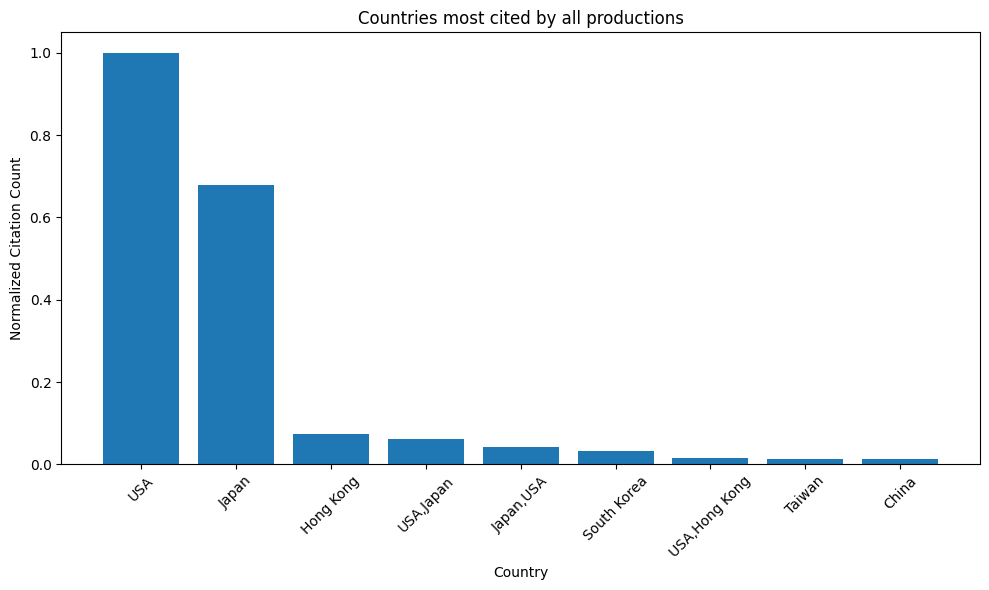

In [97]:


out_degree_centrality = nx.out_degree_centrality(graph)

countries = nx.get_node_attributes(graph, "country")

usa_citation_counts = {}
non_usa_citation_counts = {}

for node in graph.nodes():
    country = countries.get(node)
    citation_count = out_degree_centrality.get(node, 0)
    if country == "USA":
        if country not in usa_citation_counts:
            usa_citation_counts[country] = citation_count
        else:
            usa_citation_counts[country] += citation_count
    else:
        if country not in non_usa_citation_counts:
            non_usa_citation_counts[country] = citation_count
        else:
            non_usa_citation_counts[country] += citation_count

usa_df = pd.DataFrame.from_dict(usa_citation_counts, orient='index', columns=['Citation Count'])
non_usa_df = pd.DataFrame.from_dict(non_usa_citation_counts, orient='index', columns=['Citation Count'])

# normalization
usa_df['Normalized Citation Count'] = usa_df['Citation Count'] / usa_df['Citation Count'].sum()
non_usa_df['Normalized Citation Count'] = non_usa_df['Citation Count'] / non_usa_df['Citation Count'].sum()

non_usa_df = non_usa_df[non_usa_df['Normalized Citation Count'] >= 0.01]

merged_df = pd.concat([usa_df, non_usa_df], axis=0)

merged_df = merged_df.sort_values(by='Normalized Citation Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(merged_df.index, merged_df['Normalized Citation Count'])
plt.xlabel('Country')
plt.ylabel('Normalized Citation Count')
plt.title('Countries most cited by all productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(path+'/graph_files/graph1-tables/all_citation_counts_countries.png')  # Save the plot as an image file
plt.show()




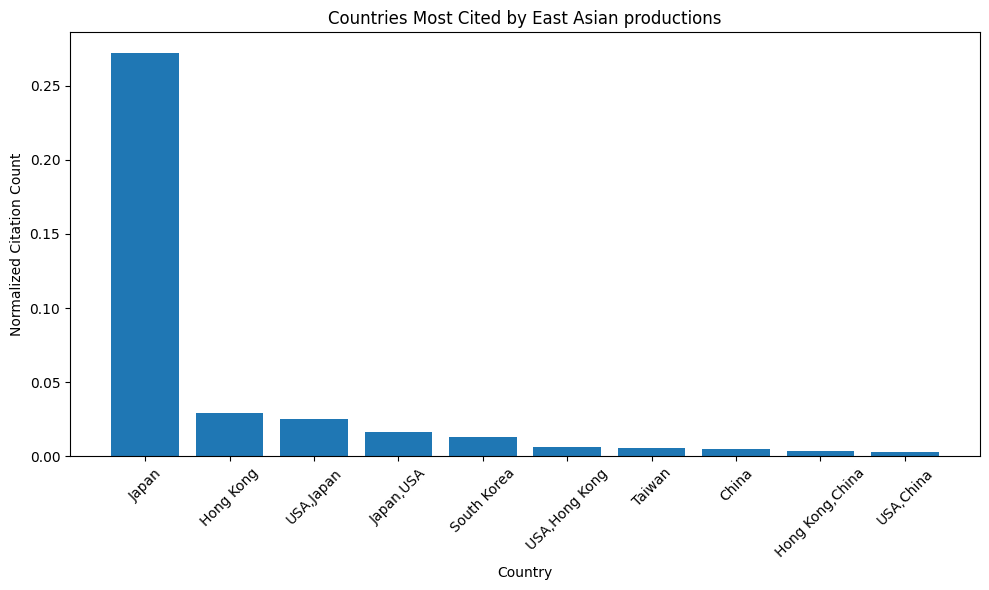

In [96]:

out_degree_centrality = nx.out_degree_centrality(graph)

#get the country attribute for each node
countries = nx.get_node_attributes(graph, "country")

usa_citation_counts = {}
non_usa_citation_counts = {}

for node in graph.nodes():
    country = countries.get(node)
    citation_count = out_degree_centrality.get(node, 0)
    if country == "USA":
        if country not in usa_citation_counts:
            usa_citation_counts[country] = citation_count
        else:
            usa_citation_counts[country] += citation_count
    else:
        if country not in non_usa_citation_counts:
            non_usa_citation_counts[country] = citation_count
        else:
            non_usa_citation_counts[country] += citation_count

usa_df = pd.DataFrame.from_dict(usa_citation_counts, orient='index', columns=['Citation Count'])
non_usa_df = pd.DataFrame.from_dict(non_usa_citation_counts, orient='index', columns=['Citation Count'])

usa_df = usa_df.sort_values(by='Citation Count', ascending=False)
non_usa_df = non_usa_df.sort_values(by='Citation Count', ascending=False)

non_usa_df = non_usa_df[non_usa_df['Citation Count'] >= 0.003]



plt.figure(figsize=(10, 6))
plt.bar(non_usa_df.index, non_usa_df['Citation Count'])
plt.xlabel('Country')
plt.ylabel('Normalized Citation Count')
plt.title('Countries Most Cited by East Asian productions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(path+'/graph_files/graph1-tables/ea_citation_counts_countries.png')  # Save the plot as an image file
plt.show()
